Particionamiento con KFold
===

* Ultima modificación: 2023-02-27 | [YouTube]()

En este método, el conjunto de datos para entrenamiento (ajuste + prueba) es dividido en $K$ grupos **no traslapados y consecutivos**. Este es un proceso iterativo que opera de la siguiente forma (véase la figura de abajo). 


* Se toma el grupo 1 como conjunto de datos de prueba (grupo rojo) y se entrena el modelo con los grupos restantes {2, ..., K} (grupo negro).


* Se toma el grupo 2 como conjunto de datos de prueba (grupo rojo) y se entrena el modelo con los grupos restantes {1, 3, ..., K} (grupo negro).


* Se continua de esta forma hasta que se usa el grupo K para prueba, mientras que se usan los grupos 1 hasta K-1 para entrenamiento.



![assets/k-fold-crossval.jpg](assets/k-fold-crossval.jpg)

De esta forma, se tienen K valores posibles para el estadístico de interés.

In [1]:
from sklearn.model_selection import KFold

kFold = KFold(
    # --------------------------------------------------------------------------
    # Número de grupos
    n_splits=5,
    # --------------------------------------------------------------------------
    # Mezcla los datos antes de crear los grupos?
    shuffle=False,
    # --------------------------------------------------------------------------
    # Semilla del generador aleatorio
    random_state=None,
)

kFold

KFold(n_splits=5, random_state=None, shuffle=False)

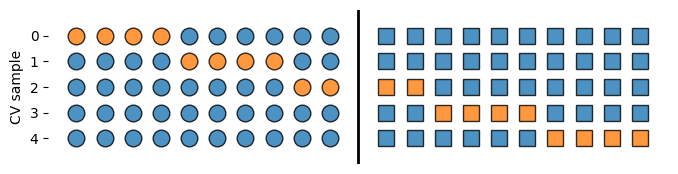

In [2]:
from mymodule import plot_schema

y_classes = [0] * 10 + [1] * 10
plot_schema(kFold, y_classes)

In [3]:
kFold.get_n_splits()

5

In [4]:
import numpy as np

X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12]])
y = np.array([1, 2, 3, 4, 5, 6])

kFold = KFold(n_splits=3)

for i, (train_index, test_index) in enumerate(kFold.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")
    print()

Fold 0:
  Train: index=[2 3 4 5]
  Test:  index=[0 1]

Fold 1:
  Train: index=[0 1 4 5]
  Test:  index=[2 3]

Fold 2:
  Train: index=[0 1 2 3]
  Test:  index=[4 5]



In [5]:
import numpy as np

X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12]])
y = np.array([1, 2, 3, 4, 5, 6])

kFold = KFold(n_splits=3, shuffle=True, random_state=123)

for i, (train_index, test_index) in enumerate(kFold.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")
    print()

Fold 0:
  Train: index=[0 2 4 5]
  Test:  index=[1 3]

Fold 1:
  Train: index=[1 2 3 5]
  Test:  index=[0 4]

Fold 2:
  Train: index=[0 1 3 4]
  Test:  index=[2 5]

